Testing the processing logic for a single file(Xray, center, azimuthal)

In [10]:
import sys
import os
# Get the current working directory (where the notebook is running)
current_dir = os.getcwd()
# Go up one level to project root (adjust based on your structure)
project_root = os.path.dirname(current_dir)
sys.path.insert(0, project_root)

In [11]:
from pathlib import Path
from src.core.processor_objects import XPSGroupProcessor
from src.io.tiff_import import TiffLoader
from src.core.mask_class import precompute_ring_mask, precompute_radial_masks, precompute_azimuthal_average_masks

In [12]:
background_dir = Path(r'C:\Users\86177\Desktop\Diffraction_code\Temp_savespace')
background_path = background_dir / "calc_bkg.tiff"
background_data = TiffLoader(background_path.parent, background_path.name)
print(f"Loaded background from: {background_path}")

Loaded background from: C:\Users\86177\Desktop\Diffraction_code\Temp_savespace\calc_bkg.tiff


In [13]:
ring_mask = precompute_ring_mask(
    inner_radius=40, 
    outer_radius=200
)

# Initialize radial masks
radial_masks = precompute_radial_masks(
    radius=512, 
    num_bins=512
)

# Initialize azimuthal mask dictionary
azimuthal_mask_dict = precompute_azimuthal_average_masks(radial_masks)

In [14]:
file_list = [
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-17790_xps188.945000_scan43_labtime02-22-10p991529.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-17791_xps188.945000_scan43_labtime02-22-11p167570.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-17792_xps188.945000_scan43_labtime02-22-11p823725.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-17793_xps188.945000_scan43_labtime02-22-12p445875.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-17794_xps188.945000_scan43_labtime02-22-13p084023.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-17795_xps188.945000_scan43_labtime02-22-13p724174.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-17796_xps188.945000_scan43_labtime02-22-14p362324.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-17797_xps188.945000_scan43_labtime02-22-15p002476.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-17798_xps188.945000_scan43_labtime02-22-15p642627.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-17799_xps188.945000_scan43_labtime02-22-16p292781.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-180_xps188.945000_scan1_labtime23-12-30p789879.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-18130_xps188.945000_scan44_labtime02-25-51p130094.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-18131_xps188.945000_scan44_labtime02-25-51p322139.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-18132_xps188.945000_scan44_labtime02-25-51p962290.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-18133_xps188.945000_scan44_labtime02-25-52p602442.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-18134_xps188.945000_scan44_labtime02-25-53p242593.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-18135_xps188.945000_scan44_labtime02-25-53p880744.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-18136_xps188.945000_scan44_labtime02-25-54p532897.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-18137_xps188.945000_scan44_labtime02-25-55p171048.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-18138_xps188.945000_scan44_labtime02-25-55p811200.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-18139_xps188.945000_scan44_labtime02-25-56p451351.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-181_xps188.945000_scan1_labtime23-12-31p075946.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-182_xps188.945000_scan1_labtime23-12-31p712096.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-183_xps188.945000_scan1_labtime23-12-32p352247.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-184_xps188.945000_scan1_labtime23-12-33p006402.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-185_xps188.945000_scan1_labtime23-12-33p646553.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-186_xps188.945000_scan1_labtime23-12-34p282704.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-18730_xps188.945000_scan45_labtime02-32-20p187408.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-18731_xps188.945000_scan45_labtime02-32-20p395457.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-18732_xps188.945000_scan45_labtime02-32-21p035608.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-18733_xps188.945000_scan45_labtime02-32-21p675760.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-18734_xps188.945000_scan45_labtime02-32-22p313910.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-18735_xps188.945000_scan45_labtime02-32-22p954061.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-18736_xps188.945000_scan45_labtime02-32-23p594213.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-18737_xps188.945000_scan45_labtime02-32-24p234364.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-18738_xps188.945000_scan45_labtime02-32-24p874515.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-18739_xps188.945000_scan45_labtime02-32-25p512666.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-187_xps188.945000_scan1_labtime23-12-34p918854.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-188_xps188.945000_scan1_labtime23-12-35p557005.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-189_xps188.945000_scan1_labtime23-12-36p197155.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-19100_xps188.945000_scan46_labtime02-36-18p137226.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-19101_xps188.945000_scan46_labtime02-36-18p489309.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-19102_xps188.945000_scan46_labtime02-36-19p129740.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-19103_xps188.945000_scan46_labtime02-36-19p767611.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-19104_xps188.945000_scan46_labtime02-36-20p407762.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-19105_xps188.945000_scan46_labtime02-36-21p045913.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-19106_xps188.945000_scan46_labtime02-36-21p686064.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-19107_xps188.945000_scan46_labtime02-36-22p326215.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-19108_xps188.945000_scan46_labtime02-36-22p964366.tiff'],
    [0, r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-19109_xps188.945000_scan46_labtime02-36-23p604517.tiff']
]

In [15]:
file_listfixed = [a[1] for a in file_list]

In [16]:
TestProcessor = XPSGroupProcessor(
    background_data=background_data,
    X_ray_config=[15, 0.7],  # [beam_threshold, expansion_threshold_ratio]
    center_config=[ring_mask, [720, 350]],  # [inner_radius, outer_radius, center_x, center_y]
    azimuthal_config=[radial_masks, azimuthal_mask_dict],  # [radius, num_bins]
    xps_value=0, #placeholder
    filelist=file_listfixed,
    resultdir=''
)
TestProcessor.precompute_xray_statistics()

2025-11-11 19:39:05,612 - INFO - Using all 50 files for X-ray statistics precomputation
2025-11-11 19:39:15,128 - INFO - X-ray statistics precomputation completed. Center region (40x40) excluded.



DEBUG PROCESSING: AndorEMCCD-7967_xps189.845000_scan19_labtime00-36-21p975950.tiff
Under:E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD

1. ORIGINAL DATA:
Data range: [432.000, 51827.000]


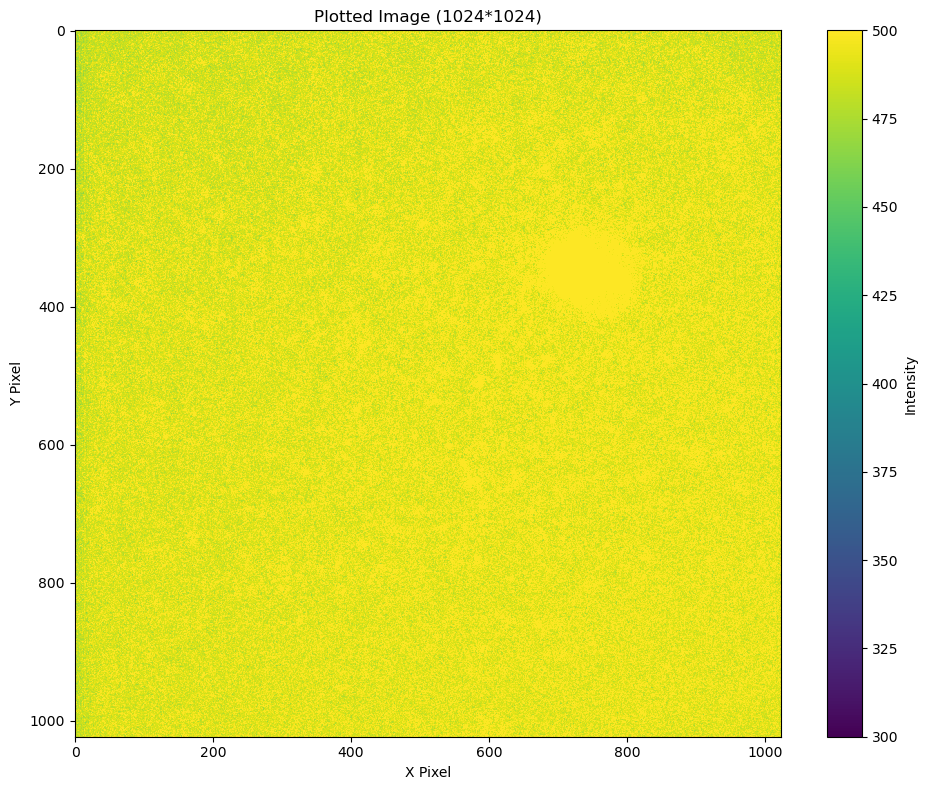


2. BACKGROUND REMOVAL:
After background removal:
Data range: [-60.000, 51299.500]
NaN count: 14


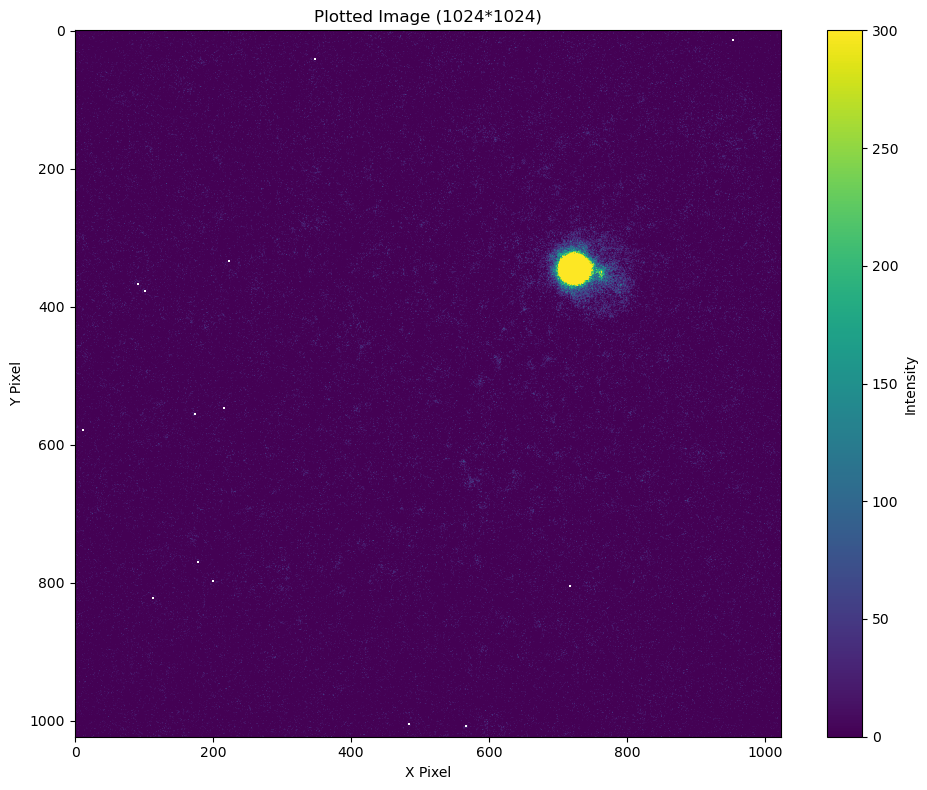


3. CENTER FINDING:
Found center: (805.96, 360.74)
Total count: 143758.00

4. AZIMUTHAL AVERAGE:
Radial profile range: [-18.000, 1461.255]
Non-NaN bins: 512/512


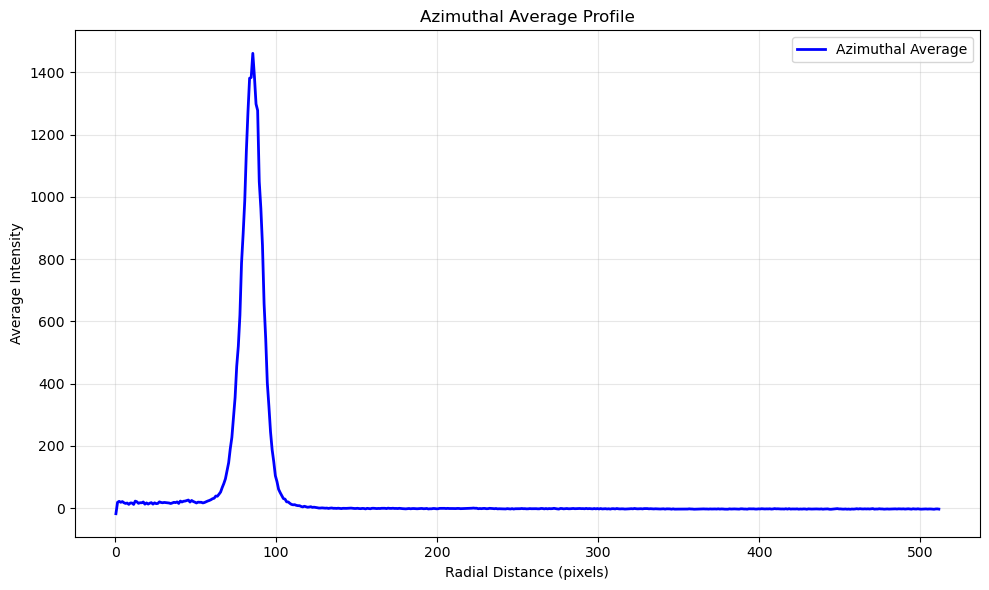


✓ SUCCESSFULLY PROCESSED: AndorEMCCD-7967_xps189.845000_scan19_labtime00-36-21p975950.tiff


In [17]:
TestProcessor.process_single_debug(r'E:\20250808\8_water_IR72deg_longscan6\fist_AndorEMCCD\AndorEMCCD-7967_xps189.845000_scan19_labtime00-36-21p975950.tiff',300,500,0,300)